<b> PHYS 4060 Lab 4 <b>
    <br>
FILTER DESIGN 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal, fft

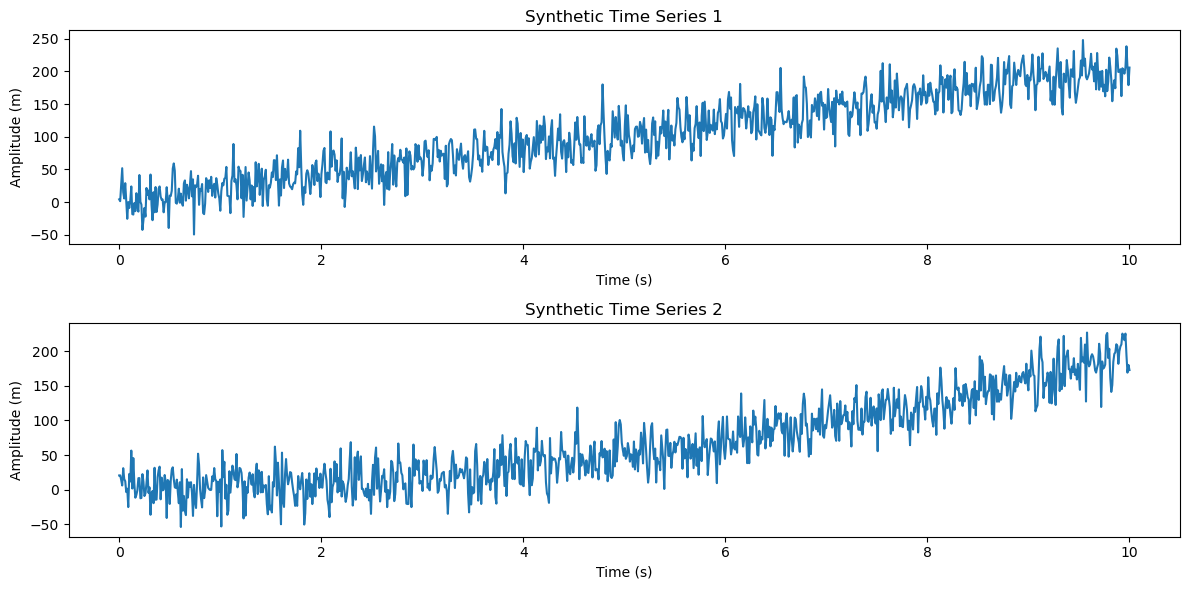

In [79]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_points = 1000  # Number of data points
t = np.linspace(0, 10, n_points)  # Time vector

# Generate the first synthetic time series
series1 = np.zeros(n_points)
num_sin = 5  # Number of sinusoids

# Lists to store individual sinusoids and their frequencies
sinusoids1 = []
frequencies1 = [1, 2, 5, 8, 12]  # Specific frequencies
amplitudes1 = [1, 2.5, 5.7, 8.6, 12.5]
phases1 = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]

for i in range(num_sin):
    freq = frequencies1[i]  # Use the specific frequencies
    amplitude = amplitudes1[i]  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids1.append(sinusoid)
    series1 += sinusoid

# Add linear trend
slope = 20
intercept = 2
linear_trend = slope * t + intercept
series1 += linear_trend

# Add random noise
noise_level = 20
noise = np.random.normal(0, noise_level, n_points)
series1 += noise

# Generate the second synthetic time series with similar characteristics
series2 = np.zeros(n_points)
sinusoids2 = []

for i in range(num_sin):
    freq = frequencies1[i]  # Use the specific frequencies
    amplitude = amplitudes1[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases1[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t + phase)
    sinusoids2.append(sinusoid)
    series2 += sinusoid

# Add quadratic trend
quadratic_trend = 2 * t**2 - 0.5 * t + 0.3
series2 += quadratic_trend

# Add random noise
noise2 = np.random.normal(0, noise_level, n_points)
series2 += noise2

# Create a figure with two rows and one column of subplots
plt.figure(figsize=(12, 6))

# Subplot for Synthetic Time Series 1
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1')
plt.plot(t, series1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

# Subplot for Synthetic Time Series 2
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2')
plt.plot(t, series2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()

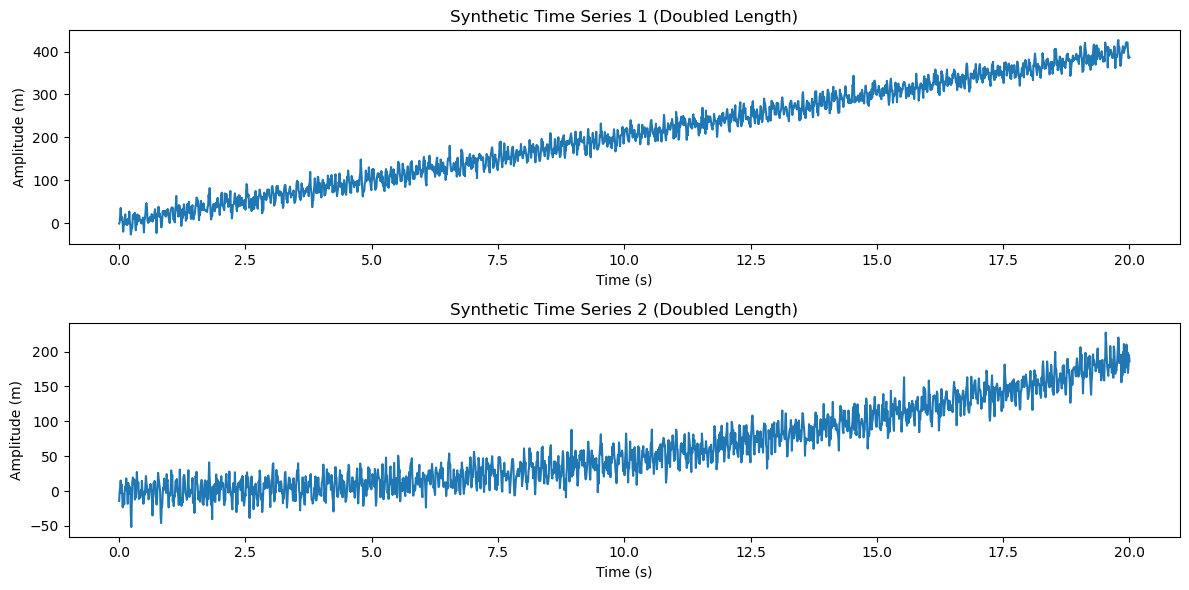

In [6]:
# Set seed for reproducibility
np.random.seed(42)

# Define parameters for the doubled length
n_points_doubled = 2000  # Double the number of data points
t_doubled = np.linspace(0, 20, n_points_doubled)  # Double the time vector

# Generate the first synthetic time series with doubled length
series1_doubled = np.zeros(n_points_doubled)
num_sin = 5  # Number of sinusoids

# Lists to store individual sinusoids and their frequencies
sinusoids1_doubled = []
frequencies1_doubled = [1, 2, 5, 8, 12]  # Specific frequencies
amplitudes1_doubled = [1, 2, 5, 8, 12]
phases1_doubled = [np.pi/4, np.pi/2, np.pi, 0, -np.pi/3]
for i in range(num_sin):
    freq = frequencies1_doubled[i]  # Use the specific frequencies
    amplitude = amplitudes1_doubled[i] #amplitude = np.random.uniform(1, 10)  # Amplitude
    phase = phases1_doubled[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)
    sinusoids1_doubled.append(sinusoid)
    series1_doubled += sinusoid

# Add linear trend
slope = 20
intercept = 2
linear_trend_doubled = slope * t_doubled + intercept
series1_doubled += linear_trend_doubled

# Add random noise
noise_level = 10
noise_doubled = np.random.normal(0, noise_level, n_points_doubled)
series1_doubled += noise_doubled

# Generate the second synthetic time series with doubled length
series2_doubled = np.zeros(n_points_doubled)
sinusoids2_doubled = []

for i in range(num_sin):
    freq = frequencies1_doubled[i]  # Use the specific frequencies
    amplitude = amplitudes1_doubled[i]  # Amplitude
    phase = phases1_doubled[i]  # Phase
    sinusoid = amplitude * np.sin(2 * np.pi * freq * t_doubled + phase)
    sinusoids2_doubled.append(sinusoid)
    series2_doubled += sinusoid

# Add quadratic trend
quadratic_trend_doubled = 0.5 * t_doubled**2 - 0.5 * t_doubled + 0.3
series2_doubled += quadratic_trend_doubled

# Add random noise
noise2_doubled = np.random.normal(0, noise_level, n_points_doubled)
series2_doubled += noise2_doubled

# Create a figure with two rows and one column of subplots
plt.figure(figsize=(12, 6))

# Subplot for Synthetic Time Series 1 (Doubled Length)
plt.subplot(2, 1, 1)
plt.title('Synthetic Time Series 1 (Doubled Length)')
plt.plot(t_doubled, series1_doubled)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

# Subplot for Synthetic Time Series 2 (Doubled Length)
plt.subplot(2, 1, 2)
plt.title('Synthetic Time Series 2 (Doubled Length)')
plt.plot(t_doubled, series2_doubled)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')

plt.tight_layout()

**Low Pass Filter**

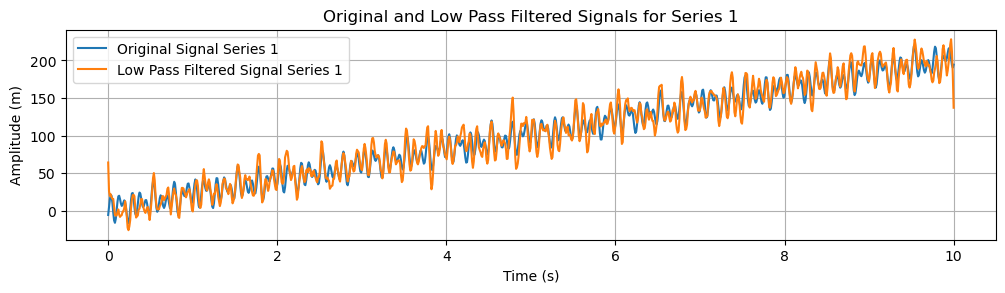

In [237]:
# Implement a simple low-pass filter manually
def lowpass_filter(time, signal, sample_rate, nu_min):
    # Calculate Fourier Coefficients and Frequencies
    ck_signal = fft.fft(signal, norm='forward')
    nu_s = 1 / (1 / sample_rate)
    k = np.arange(len(time))
    nu_k = np.where(k < len(time)/2, k * nu_s / len(time), (len(time) - k) * nu_s / len(time))

    # Calculate Gain (Filter in Frequency Domain)
    gk_signal = np.where(np.abs(nu_k) < nu_min, 1, 1/(1+ (nu_k*1j)/nu_min))

    # Inverse Fourier Transform (Back to Time Domain)
    filtered_signal = fft.ifft(ck_signal * gk_signal, norm='forward').real
    
    return filtered_signal

# Set the cutoff frequency (adjust this based on your analysis)
cutoff_frequency = 12.5  # Adjust as needed
sampling_interval = ((t[-1] - t[0]) / n_points)
sample_rate = 1/sampling_interval

# Apply the filter to the time series
filtered_series1_manual = lowpass_filter(t, series1, sample_rate, cutoff_frequency)

# Plot the original and manually filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series1 - noise, label='Original Signal Series 1')
plt.plot(t, filtered_series1_manual, label='Low Pass Filtered Signal Series 1')
plt.title('Original and Low Pass Filtered Signals for Series 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

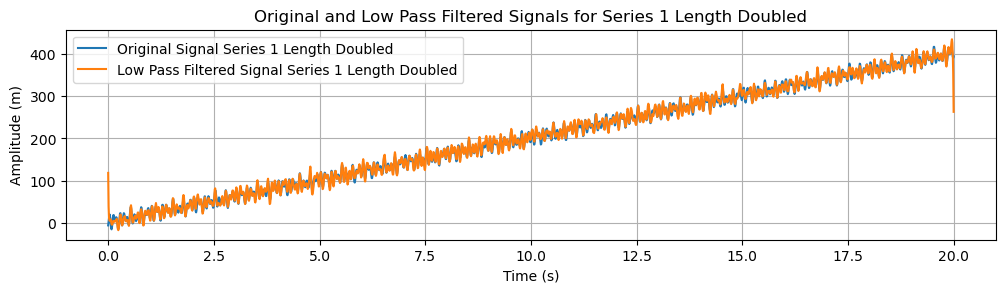

In [238]:
# Set the cutoff frequency (adjust this based on your analysis)
cutoff_frequency = 12.5  # Adjust as needed
sampling_interval_doubled = (t_doubled[-1] - t_doubled[0]) / n_points_doubled
smaple_rate_doubled = 1/sampling_interval_doubled
# Apply the filter to the time series
filtered_series1_manual_doubled = lowpass_filter(t_doubled, series1_doubled, sample_rate_doubled, cutoff_frequency)

# Plot the original and manually filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series1_doubled - noise_doubled, label='Original Signal Series 1 Length Doubled')
plt.plot(t_doubled, filtered_series1_manual_doubled, label='Low Pass Filtered Signal Series 1 Length Doubled')
plt.title('Original and Low Pass Filtered Signals for Series 1 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

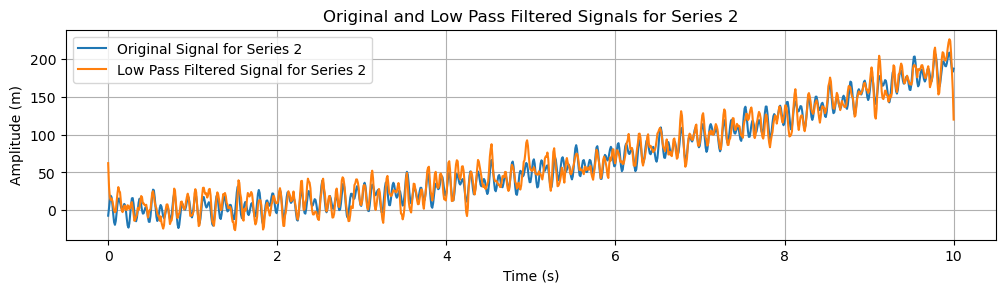

In [239]:
# Apply the filter to the time series
filtered_series2_manual = lowpass_filter(t, series2, sample_rate, cutoff_frequency)

# Plot the original and manually filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series2 - noise2, label='Original Signal for Series 2')
plt.plot(t, filtered_series2_manual, label='Low Pass Filtered Signal for Series 2')
plt.title('Original and Low Pass Filtered Signals for Series 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

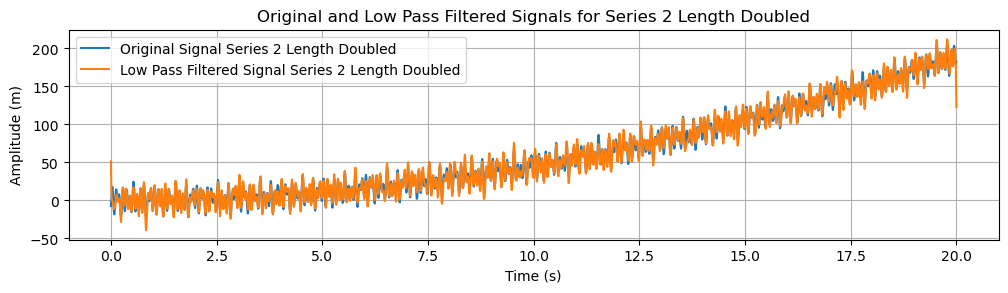

In [240]:
# Apply the filter to the time series
filtered_series2_manual_doubled = lowpass_filter(t_doubled, series2_doubled, sample_rate_doubled, cutoff_frequency)

# Plot the original and manually filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series2_doubled - noise2_doubled, label='Original Signal Series 2 Length Doubled')
plt.plot(t_doubled, filtered_series2_manual_doubled, label='Low Pass Filtered Signal Series 2 Length Doubled')
plt.title('Original and Low Pass Filtered Signals for Series 2 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

In [241]:
# Calculate Auto-Covariance Function
def autocovariance(series, lag):
    n = len(series)
    autocovar_sum = 0
    mean_series = np.mean(series)
    for t in range(n - lag):
        autocovar_sum += (series[t] - mean_series) * (series[t + lag] - mean_series)
    return autocovar_sum / n
def FourierTransform(autocovariance):
    sampling_frequency = 1 / (t[1] - t[0])
    power_spectrum = np.fft.fft(autocovariance)
    fft_freqs = np.fft.fftfreq(len(power_spectrum), 1/sampling_frequency)
    return power_spectrum, fft_freqs, sampling_frequency

def SeriesTransforms(series, points, lag_i, lag_f, power_spectrum_title):
    autocov_list = []
    lag = np.linspace(lag_i, lag_f, (lag_f - lag_i))
    for i in lag:
        autocov_series = autocovariance(series, int(i))
        autocov_list.append(autocov_series)
    power_spectrum, fft_freqs, sampling_frequency = FourierTransform(autocov_list)
    power_spectrum = np.real(power_spectrum)
    psd = []
    for i in range(len(power_spectrum)):
        if fft_freqs[i] != 0:
            psd.append((np.abs(power_spectrum[i])**2) / (fft_freqs[i]))
        else:
            # Handle the case when fft_freqs[i] is 0 (DC component)
            psd.append(np.abs(power_spectrum[i])**2)

     
   # Select positive frequencies
    positive_freqs_mask = fft_freqs >= 0
    fft_freqs = fft_freqs[positive_freqs_mask]
    power_spectrum = power_spectrum[positive_freqs_mask]
    psd = np.array(psd)[positive_freqs_mask]
    
    # Plot of PSD
    plt.figure(figsize=(12,4))
    plt.title(power_spectrum_title)
    plt.semilogy(fft_freqs, psd, label='Power Spectral Density')
    plt.xlabel('Freqeuncy [Hz]')
    plt.ylabel('Power Spectral Density (m$^2$/Hz)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return

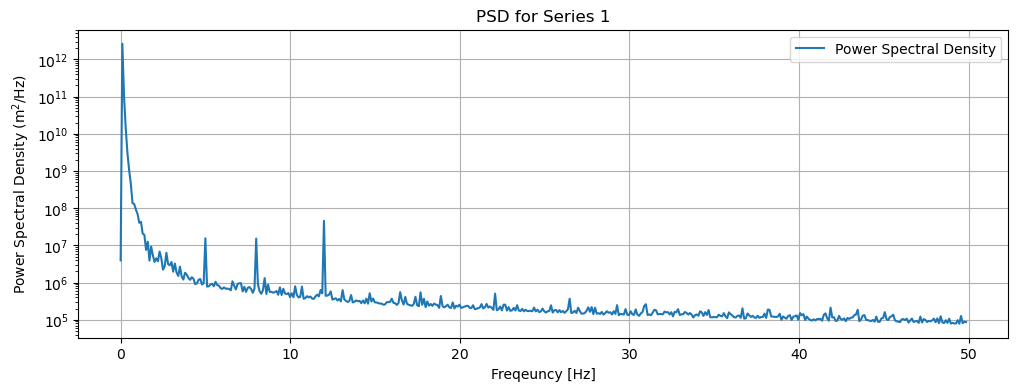

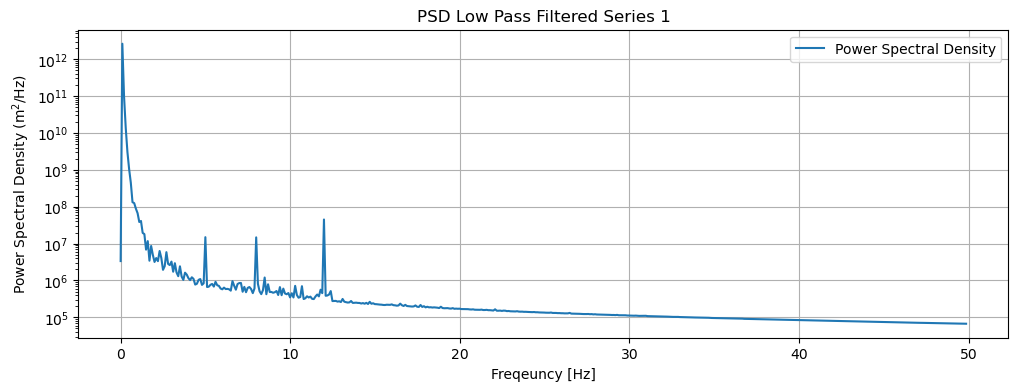

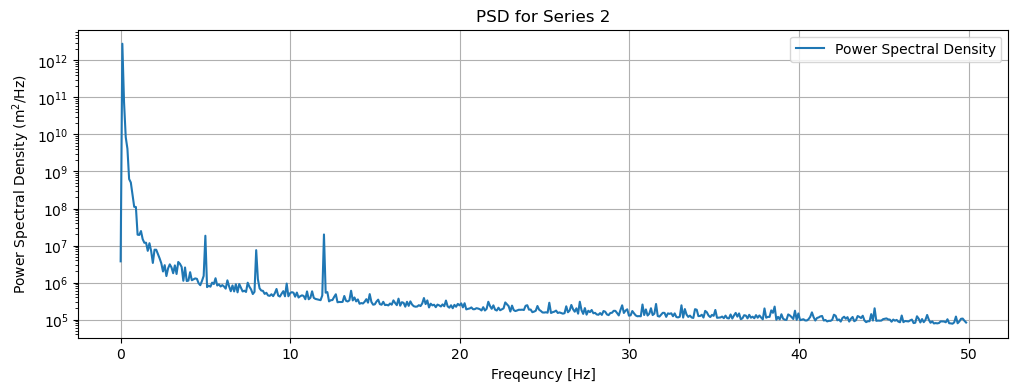

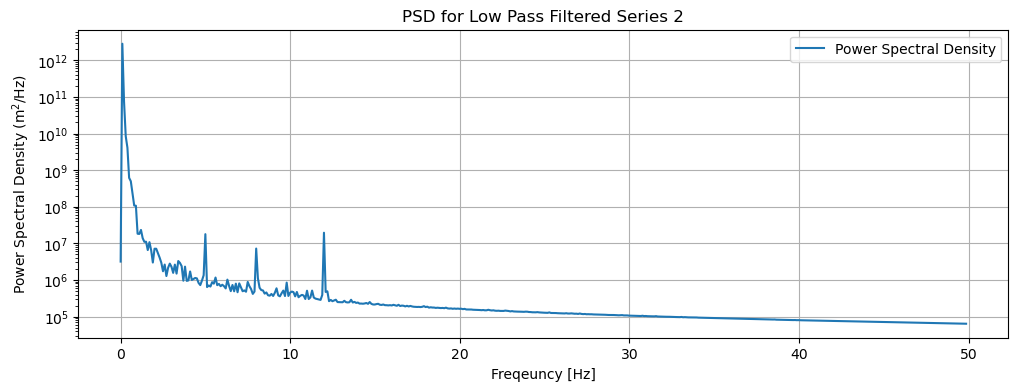

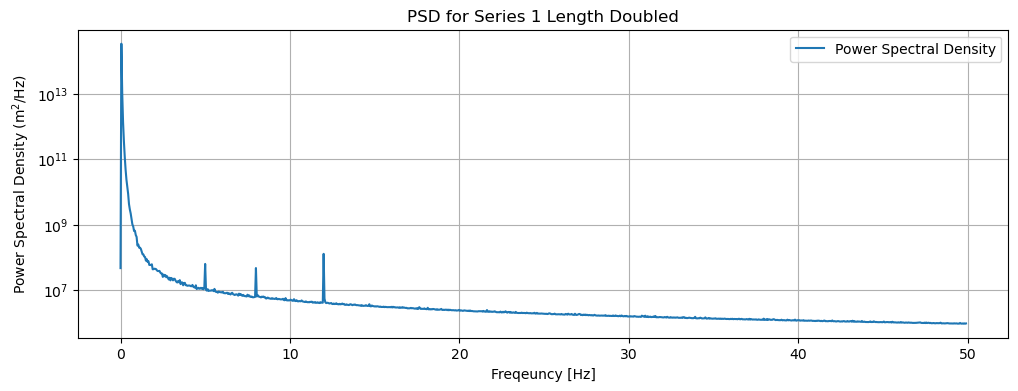

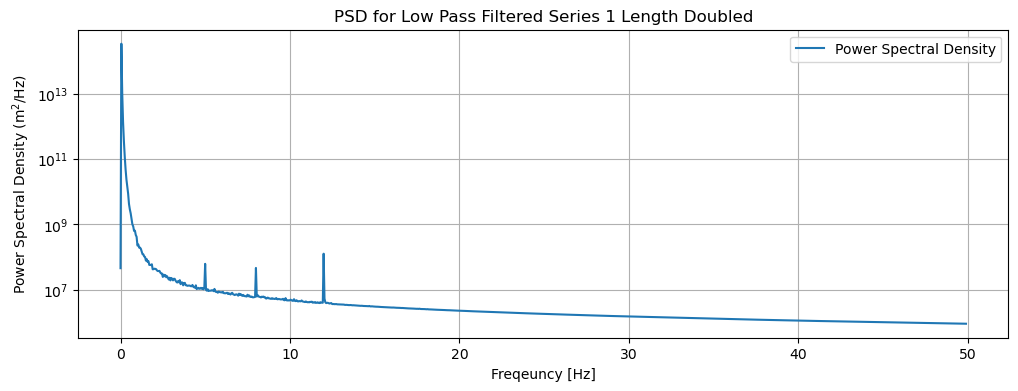

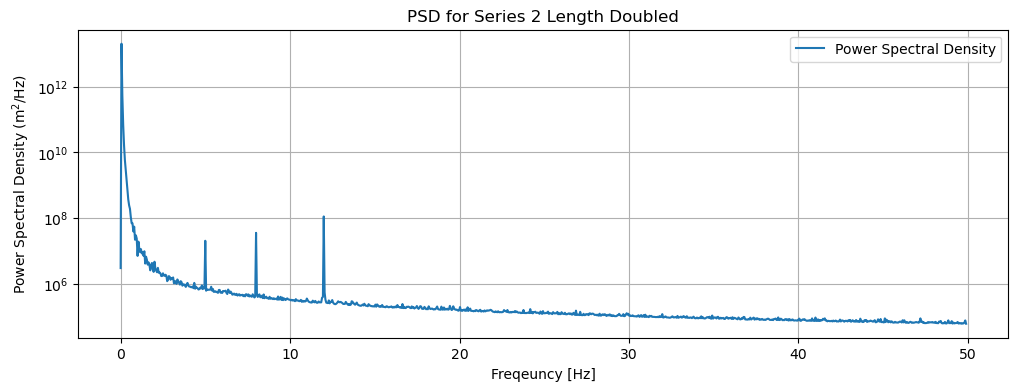

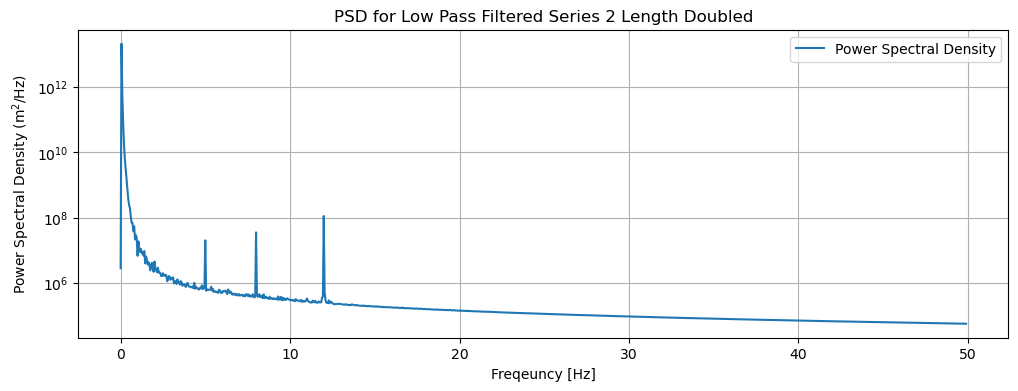

In [272]:
# Fourier Transforming 
SeriesTransforms(series1, n_points, 0, 1000, 'PSD for Series 1')
SeriesTransforms(filtered_series1_manual, n_points, 0, 1000, 'PSD Low Pass Filtered Series 1')
SeriesTransforms(series2, n_points, 0, 1000, 'PSD for Series 2')
SeriesTransforms(filtered_series2_manual, n_points, 0, 1000, 'PSD for Low Pass Filtered Series 2')
SeriesTransforms(series1_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Length Doubled')
SeriesTransforms(filtered_series1_manual_doubled, n_points_doubled, 0, 2000, 'PSD for Low Pass Filtered Series 1 Length Doubled')
SeriesTransforms(series2_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Length Doubled')
SeriesTransforms(filtered_series2_manual_doubled, n_points_doubled, 0, 2000, 'PSD for Low Pass Filtered Series 2 Length Doubled')

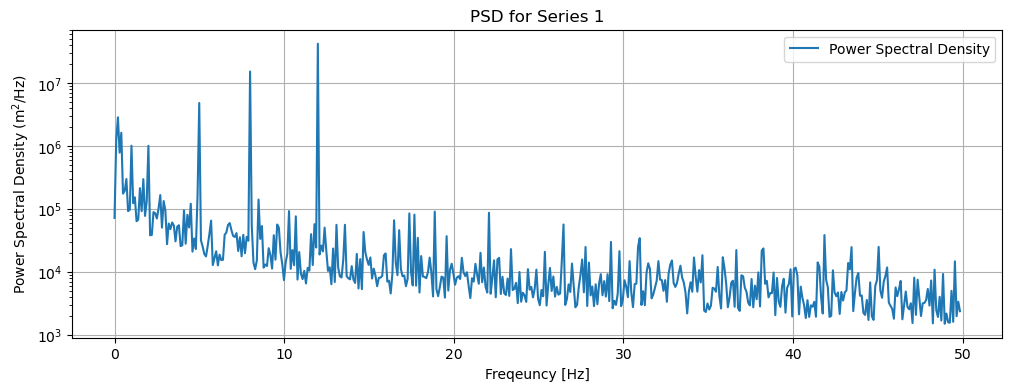

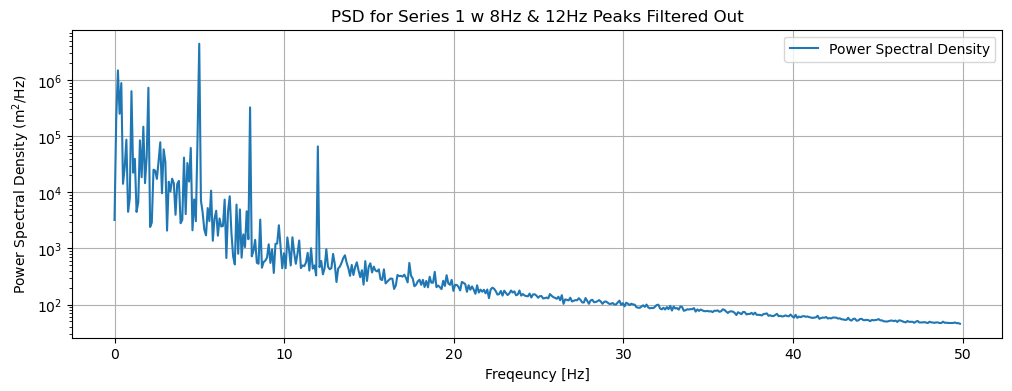

In [243]:
# Setting Cutoff Frequency to remove two highest sinusoid frequencies
cutoff_frequency2 = 5.5 # Adjust as needed
# Apply the filter to the time series
two_peaksfiltered_series1 = lowpass_filter(t, series1, sample_rate, cutoff_frequency2)


# Fourier Transforming 
SeriesTransforms(series1 - linear_trend, n_points, 0, 1000, 'PSD for Series 1')
SeriesTransforms(two_peaksfiltered_series1 - linear_trend, n_points, 0, 1000, 'PSD for Series 1 w 8Hz & 12Hz Peaks Filtered Out')

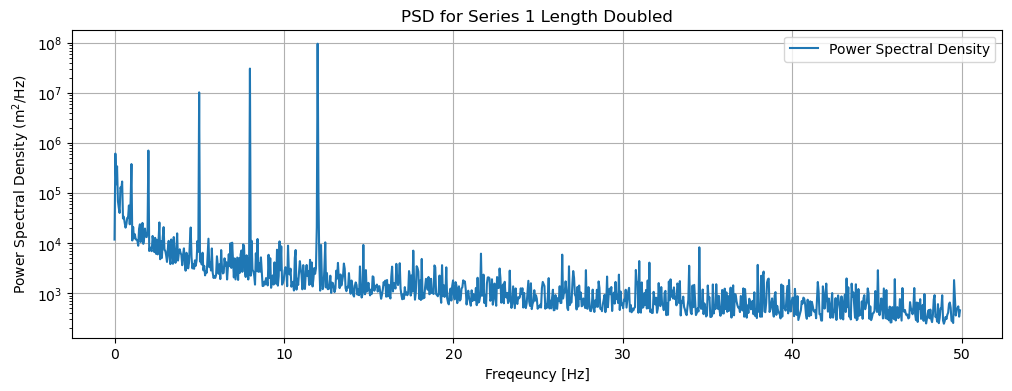

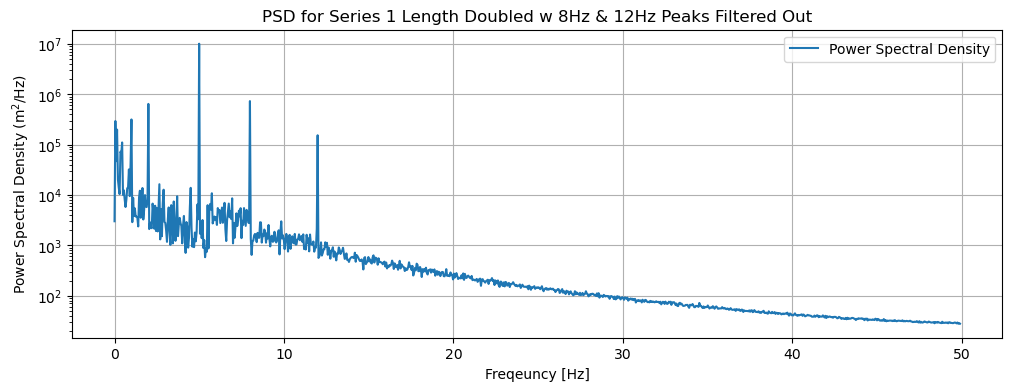

In [244]:
# Apply the filter to the time series
two_peaksfiltered_series1_doubled = lowpass_filter(t_doubled, series1_doubled, sample_rate_doubled, cutoff_frequency2)


# Fourier Transforming 
SeriesTransforms(series1_doubled - linear_trend_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Length Doubled')
SeriesTransforms(two_peaksfiltered_series1_doubled - linear_trend_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Length Doubled w 8Hz & 12Hz Peaks Filtered Out')

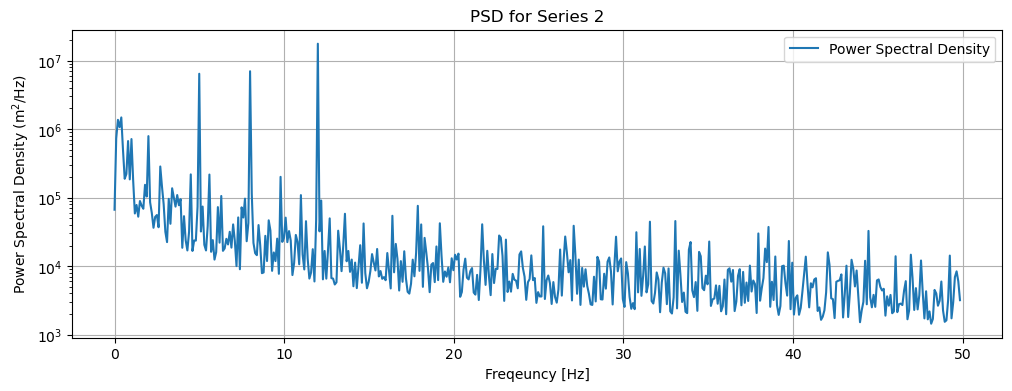

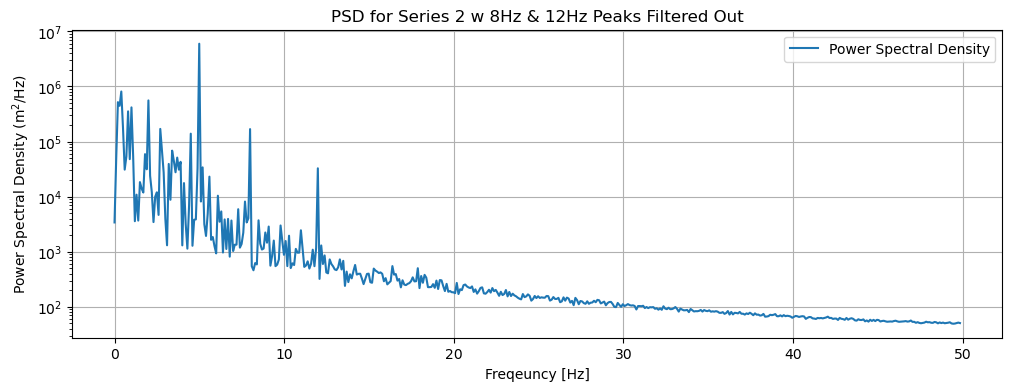

In [245]:
# Apply the filter to the time series
two_peaksfiltered_series2 = lowpass_filter(t, series2, sample_rate, cutoff_frequency2)


# Fourier Transforming 
SeriesTransforms(series2 - quadratic_trend, n_points, 0, 1000, 'PSD for Series 2')
SeriesTransforms(two_peaksfiltered_series2 - quadratic_trend, n_points, 0, 1000, 'PSD for Series 2 w 8Hz & 12Hz Peaks Filtered Out')

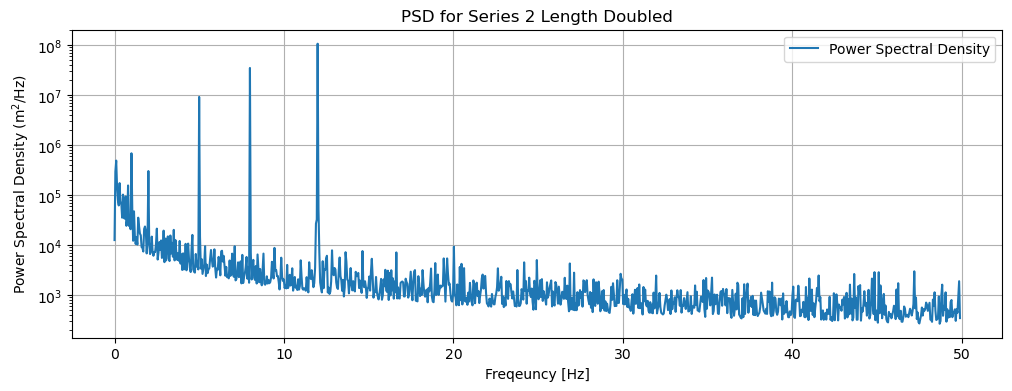

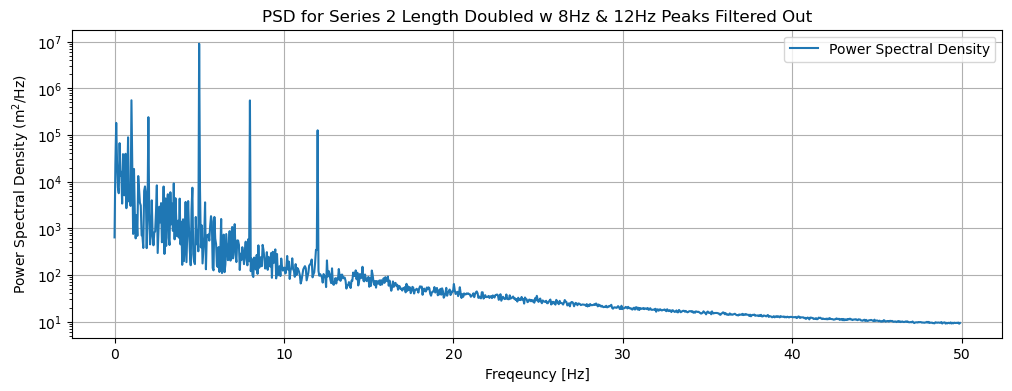

In [246]:
# Apply the filter to the time series
two_peaksfiltered_series2_doubled = lowpass_filter(t_doubled, series2_doubled, sample_rate_doubled, cutoff_frequency2)


# Fourier Transforming 
SeriesTransforms(series2_doubled - quadratic_trend_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Length Doubled')
SeriesTransforms(two_peaksfiltered_series2_doubled - quadratic_trend_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Length Doubled w 8Hz & 12Hz Peaks Filtered Out')

**High Pass Filter**

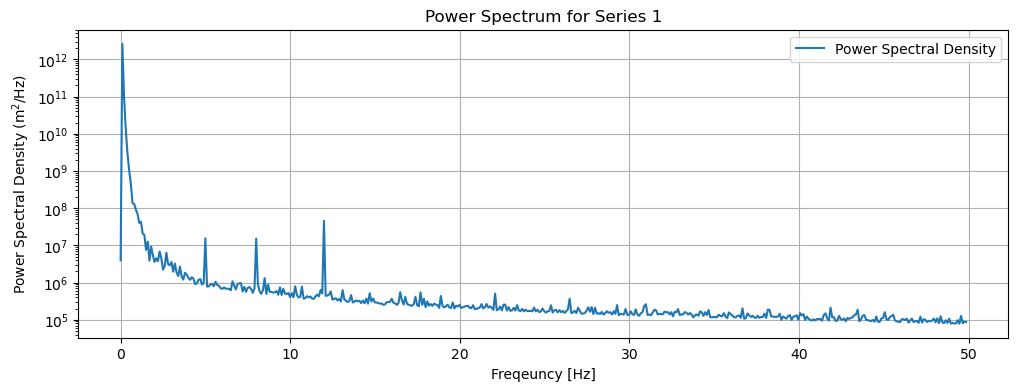

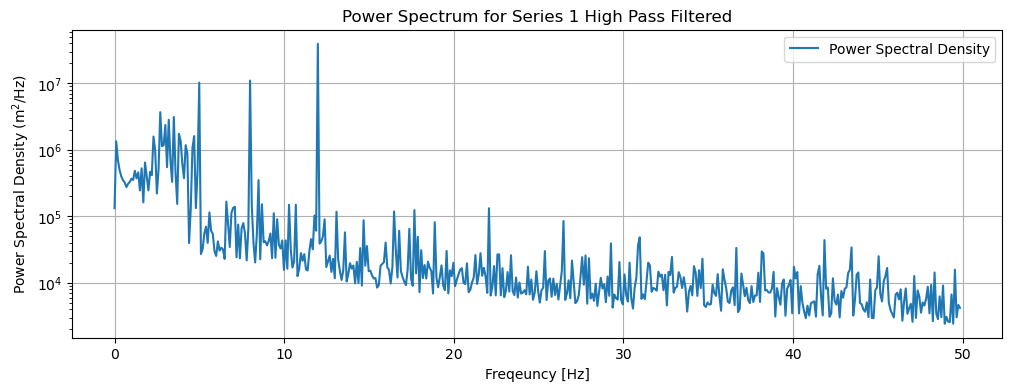

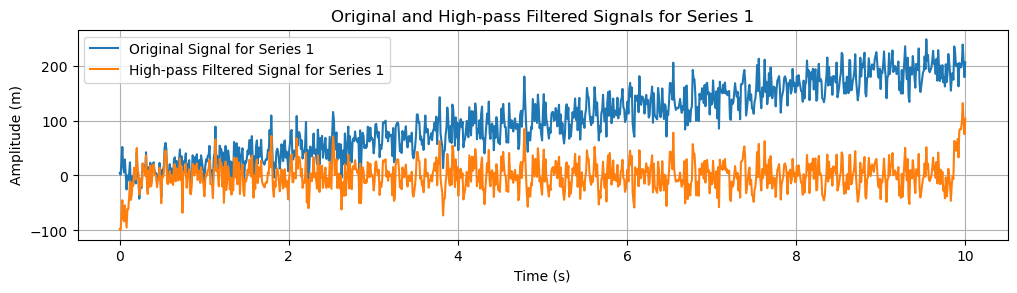

In [274]:
# Implement a simple high-pass filter manually
def highpass_filter(time, signal, sample_rate, nu_max):
    # Calculate Fourier Coefficients and Frequencies
    ck_signal = fft.fft(signal, norm='forward')
    nu_s = 1 / (1 / sample_rate)
    k = np.arange(len(time))
    nu_k = np.where(k < len(time)/2, k * nu_s / len(time), (len(time) - k) * nu_s / len(time))

    # Calculate Gain (Filter in Frequency Domain)
    gk_signal = np.where(np.abs(nu_k) > nu_max, 1, (nu_k*1j)/(nu_k*1j/nu_max + 1))

    # Inverse Fourier Transform (Back to Time Domain)
    filtered_signal = fft.ifft(ck_signal * gk_signal, norm='forward').real
    
    return filtered_signal
# Set the cutoff frequency (adjust this based on your analysis)
cutoff_frequency3 = 4.9 # Adjust as needed
# Apply the filter to the time series
series1_filtered_highpass = highpass_filter(t, series1, sample_rate, cutoff_frequency3)

# Fourier Transforming 
SeriesTransforms(series1, n_points, 0, 1000, 'Power Spectrum for Series 1')
SeriesTransforms(series1_filtered_highpass, n_points, 0, 1000, 'Power Spectrum for Series 1 High Pass Filtered')

# Plot the original and manually high-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series1, label='Original Signal for Series 1')
plt.plot(t, series1_filtered_highpass, label='High-pass Filtered Signal for Series 1')
plt.title('Original and High-pass Filtered Signals for Series 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

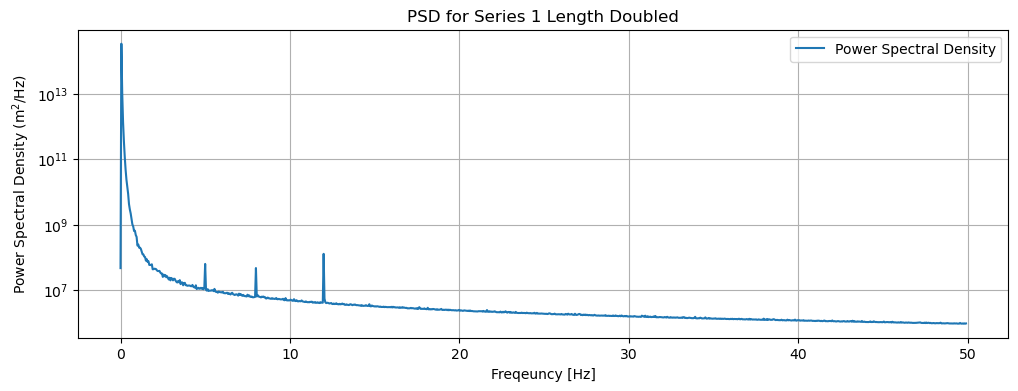

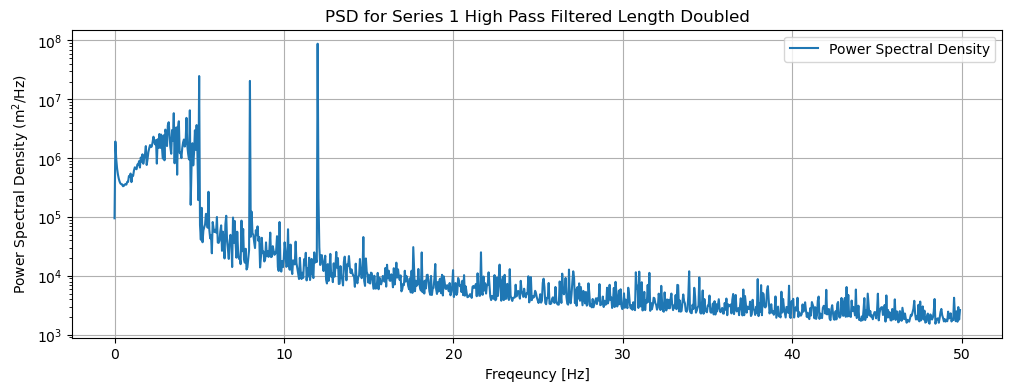

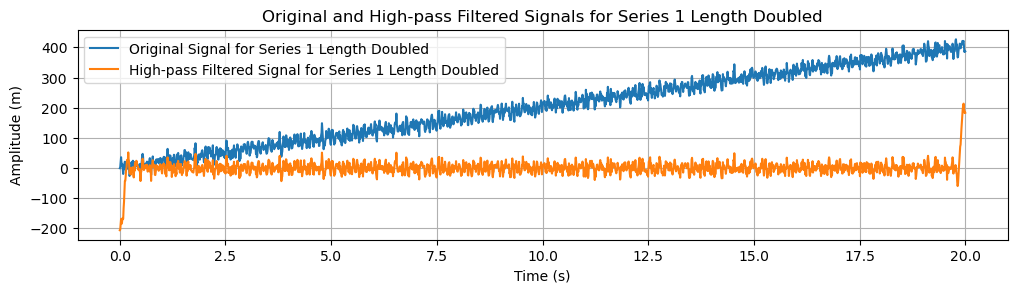

In [275]:
# Apply the filter to the time series
series1_filtered_highpass_doubled = highpass_filter(t_doubled, series1_doubled, sample_rate_doubled, cutoff_frequency3)

# Fourier Transforming 
SeriesTransforms(series1_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Length Doubled')
SeriesTransforms(series1_filtered_highpass_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 High Pass Filtered Length Doubled')

# Plot the original and manually high-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series1_doubled, label='Original Signal for Series 1 Length Doubled')
plt.plot(t_doubled, series1_filtered_highpass_doubled, label='High-pass Filtered Signal for Series 1 Length Doubled')
plt.title('Original and High-pass Filtered Signals for Series 1 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

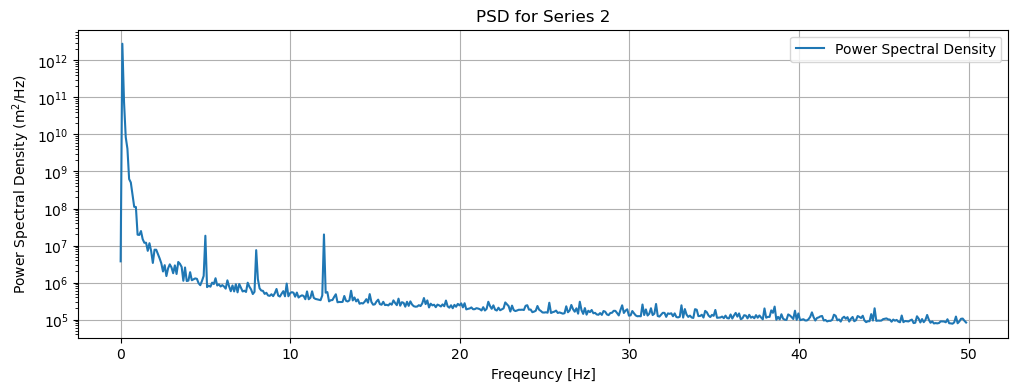

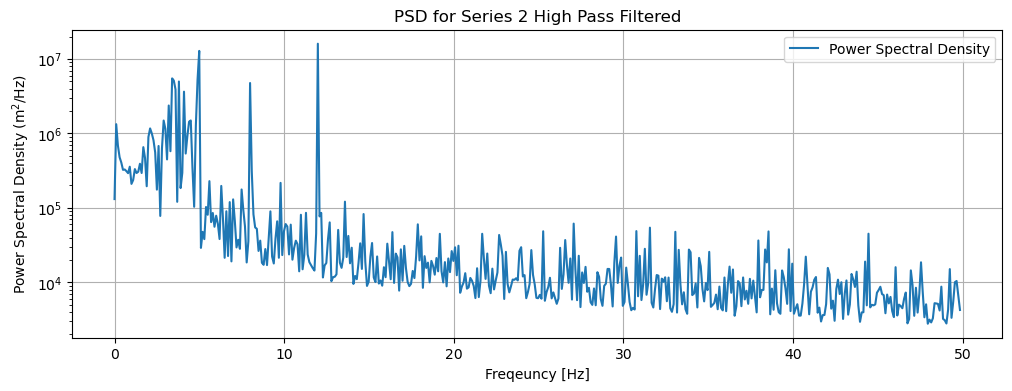

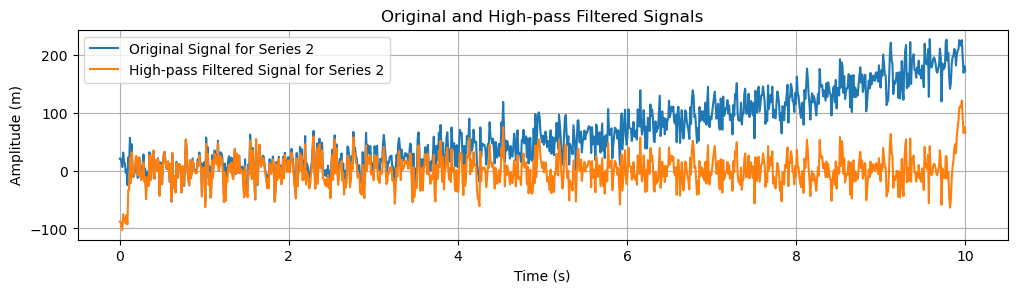

In [276]:
# Apply the filter to the time series
series2_filtered_highpass = highpass_filter(t, series2, sample_rate, cutoff_frequency3)

# Fourier Transforming 
SeriesTransforms(series2, n_points, 0, 1000, 'PSD for Series 2')
SeriesTransforms(series2_filtered_highpass, n_points, 0, 1000, 'PSD for Series 2 High Pass Filtered')

# Plot the original and manually high-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series2, label='Original Signal for Series 2')
plt.plot(t, series2_filtered_highpass, label='High-pass Filtered Signal for Series 2')
plt.title('Original and High-pass Filtered Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

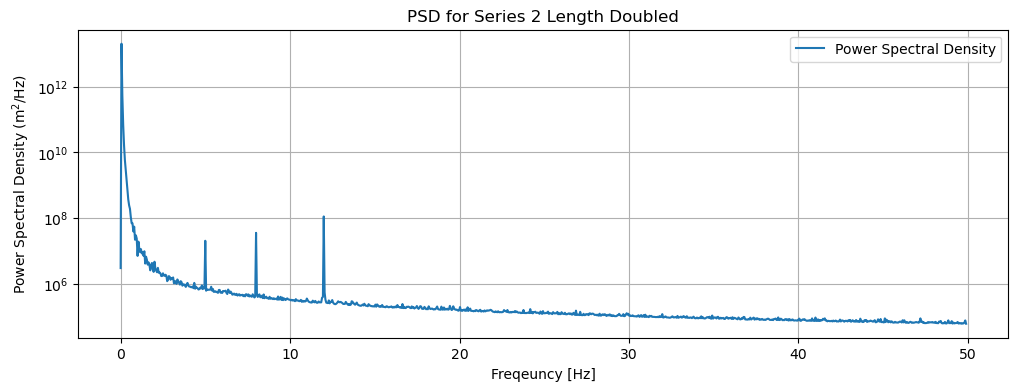

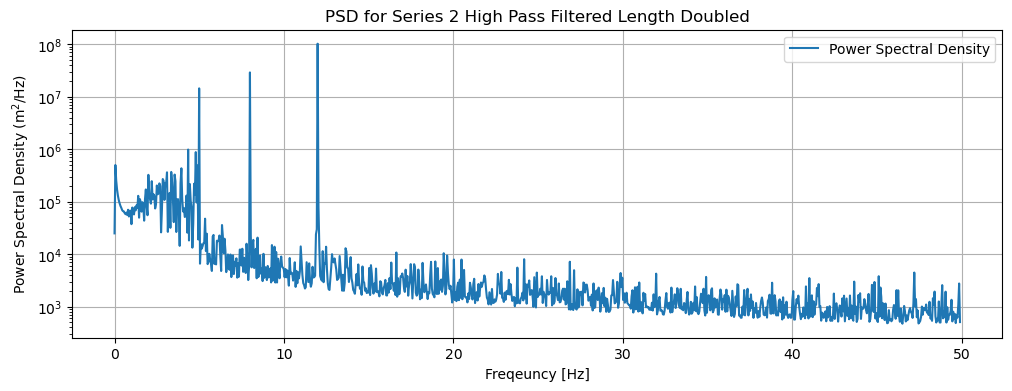

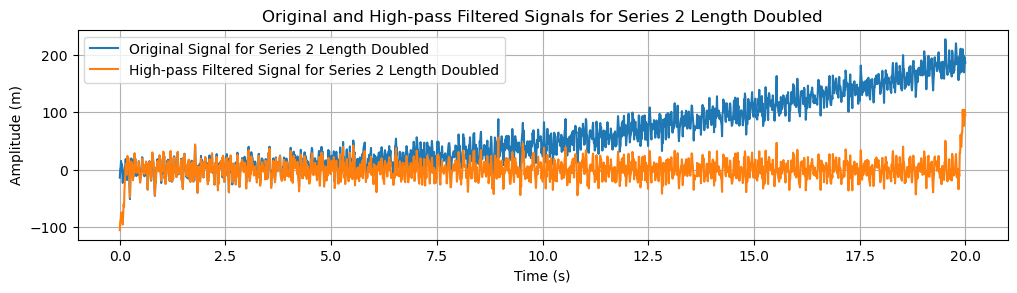

In [277]:
# Apply the filter to the time series
series2_filtered_highpass_doubled = highpass_filter(t_doubled, series2_doubled, sample_rate_doubled, cutoff_frequency3)

# Fourier Transforming 
SeriesTransforms(series2_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Length Doubled')
SeriesTransforms(series2_filtered_highpass_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 High Pass Filtered Length Doubled')

# Plot the original and manually high-pass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series2_doubled, label='Original Signal for Series 2 Length Doubled')
plt.plot(t_doubled, series2_filtered_highpass_doubled, label='High-pass Filtered Signal for Series 2 Length Doubled')
plt.title('Original and High-pass Filtered Signals for Series 2 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

**Bandpass Filter**

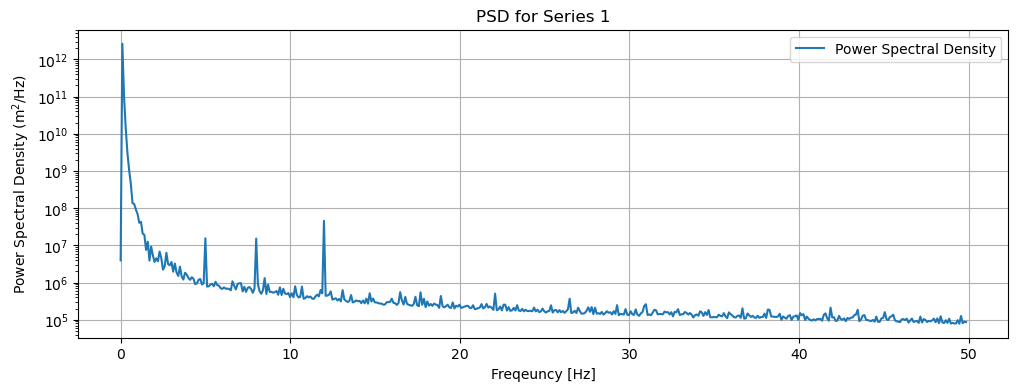

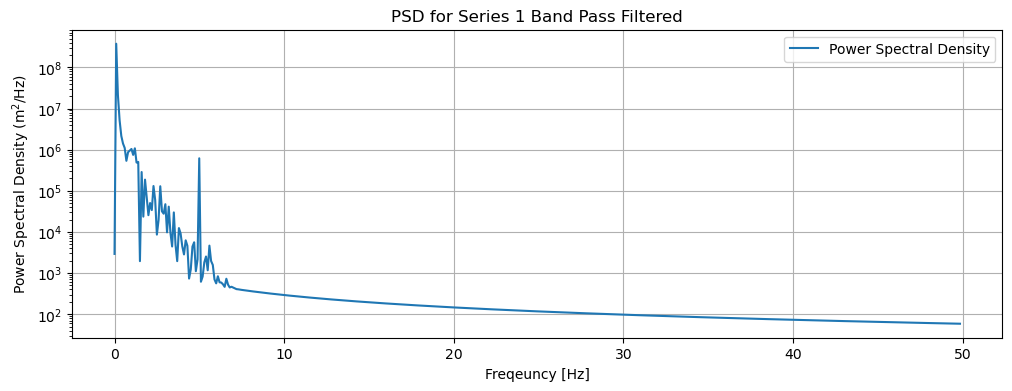

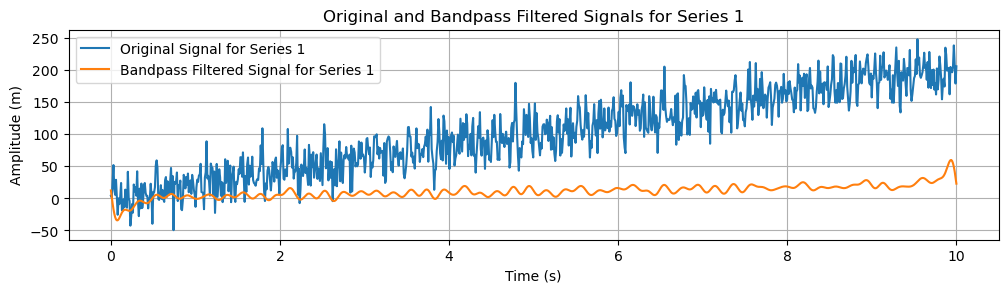

In [265]:
# Implement a simple bandpass filter manually
def bandpass_filter(signal, low_cutoff, high_cutoff, sample_rate, std):
    sampling_frequency = 1 / (1 / sample_rate)
    fft_result = np.fft.fft(signal)
    fftfreqs = np.fft.fftfreq(len(fft_result),1/sampling_frequency)
    
    window = []
    for i in range(len(fftfreqs)):
        if fftfreqs[i] < low_cutoff:
            window.append(np.exp(-((fftfreqs[i] - low_cutoff)/std)**2))
        elif (fftfreqs[i] > low_cutoff) & (fftfreqs[i] < high_cutoff):
            window.append(1)
        else:
            window.append(np.exp(-((fftfreqs[i] - high_cutoff)/std)**2))
    
    filtered_fft_result = fft_result * window
    filtered_signal = np.fft.ifft(filtered_fft_result).real
    
    return filtered_signal

# Set the cutoff frequencies to filter out sinusoids at 2Hz and 5Hz
cutoff_frequency_low = 1.5 # Exclude frequencies below 2Hz
cutoff_frequency_high = 5.5  # Exclude frequencies above 5Hz

# Apply the custom bandpass filter to the time series
filtered_series1_bandpass = bandpass_filter(series1, cutoff_frequency_low, cutoff_frequency_high, sample_rate, 1)

# Fourier Transforming 
SeriesTransforms(series1, n_points, 0, 1000, 'PSD for Series 1')
SeriesTransforms(filtered_series1_bandpass, n_points, 0, 1000, 'PSD for Series 1 Band Pass Filtered')

# Plot the original and bandpass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series1 , label='Original Signal for Series 1')
plt.plot(t, filtered_series1_bandpass, label='Bandpass Filtered Signal for Series 1')
plt.title('Original and Bandpass Filtered Signals for Series 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

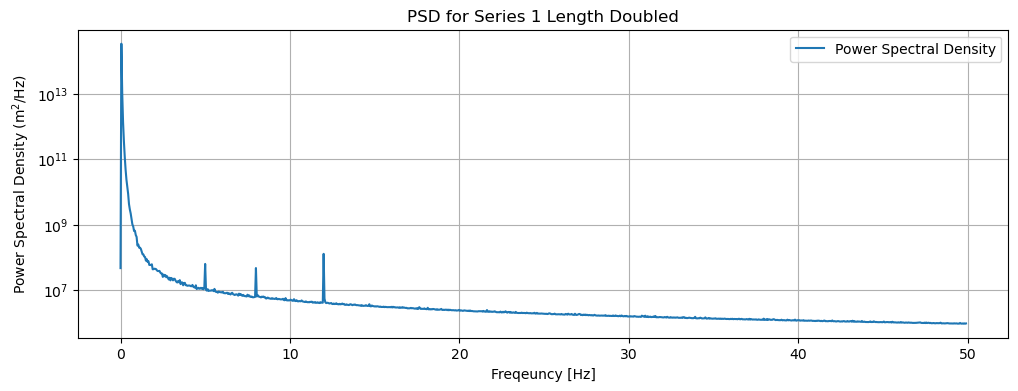

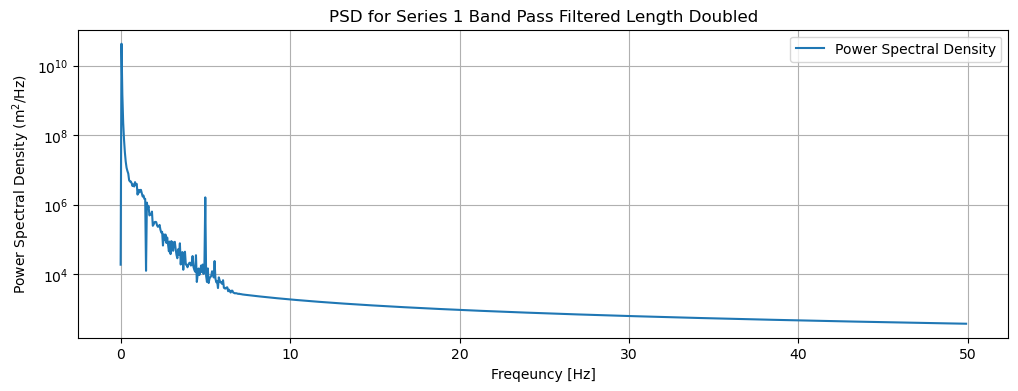

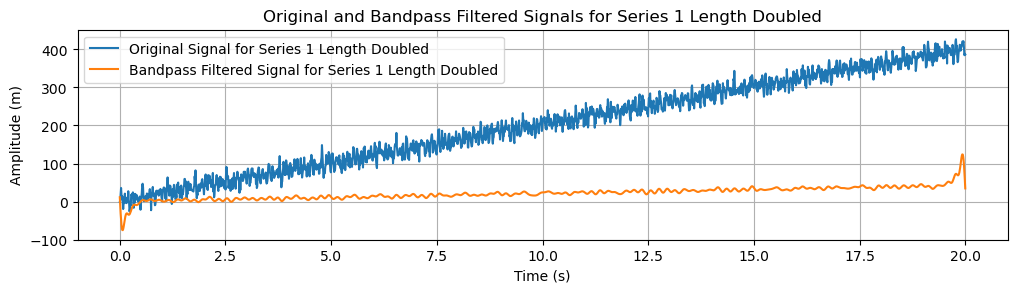

In [267]:
# Apply the custom bandpass filter to the time series
filtered_series1_bandpass_doubled = bandpass_filter(series1_doubled, cutoff_frequency_low, cutoff_frequency_high, sample_rate_doubled, 1)

# Fourier Transforming 
SeriesTransforms(series1_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Length Doubled')
SeriesTransforms(filtered_series1_bandpass_doubled, n_points_doubled, 0, 2000, 'PSD for Series 1 Band Pass Filtered Length Doubled')

# Plot the original and bandpass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series1_doubled, label='Original Signal for Series 1 Length Doubled')
plt.plot(t_doubled, filtered_series1_bandpass_doubled, label='Bandpass Filtered Signal for Series 1 Length Doubled')
plt.title('Original and Bandpass Filtered Signals for Series 1 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

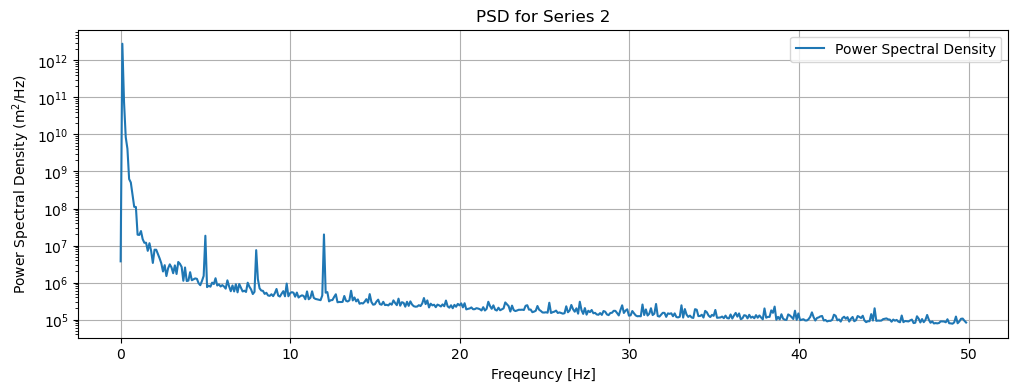

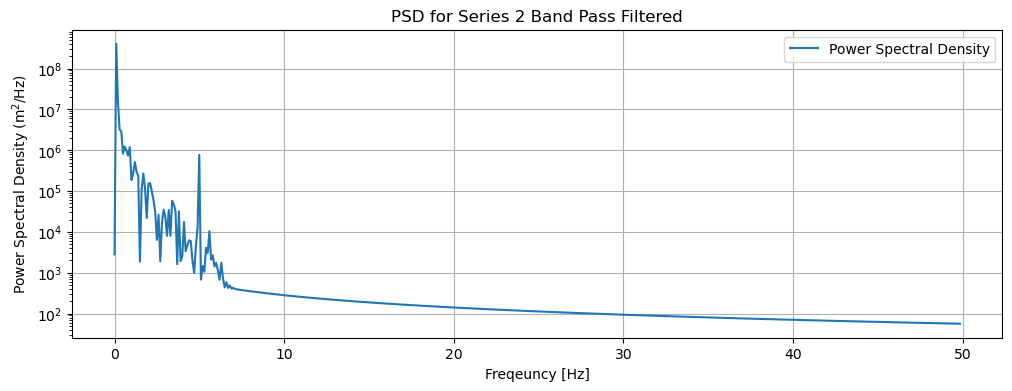

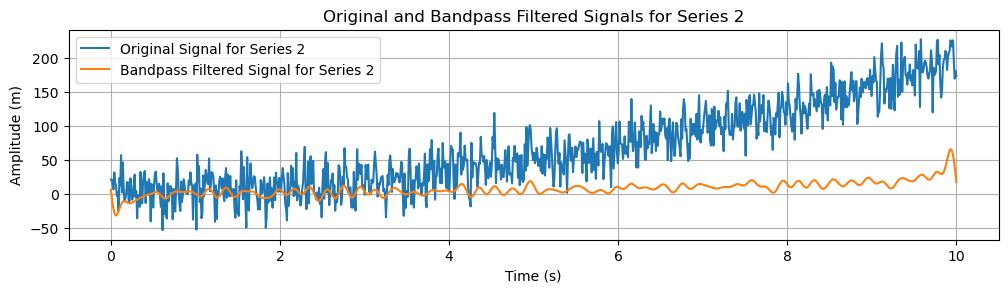

In [269]:
# Apply the custom bandpass filter to the time series
filtered_series2_bandpass = bandpass_filter(series2, cutoff_frequency_low, cutoff_frequency_high, sample_rate, 1)

# Fourier Transforming 
SeriesTransforms(series2, n_points, 0, 1000, 'PSD for Series 2')
SeriesTransforms(filtered_series2_bandpass, n_points, 0, 1000, 'PSD for Series 2 Band Pass Filtered')

# Plot the original and bandpass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, series2, label='Original Signal for Series 2')
plt.plot(t, filtered_series2_bandpass, label='Bandpass Filtered Signal for Series 2')
plt.title('Original and Bandpass Filtered Signals for Series 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()

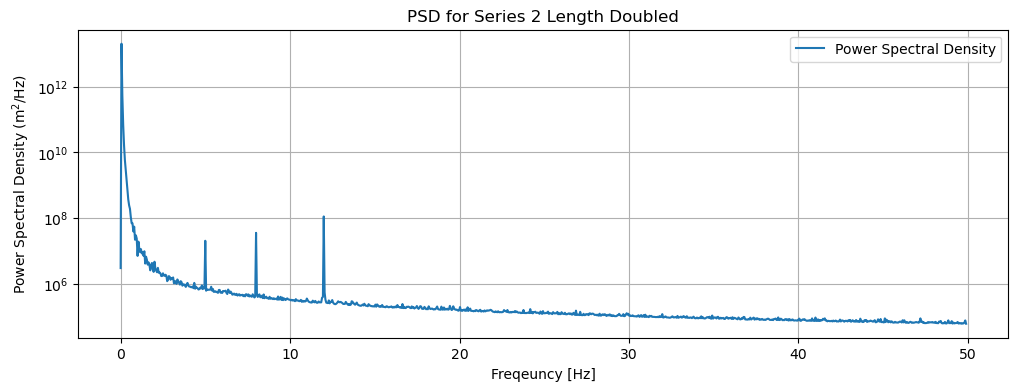

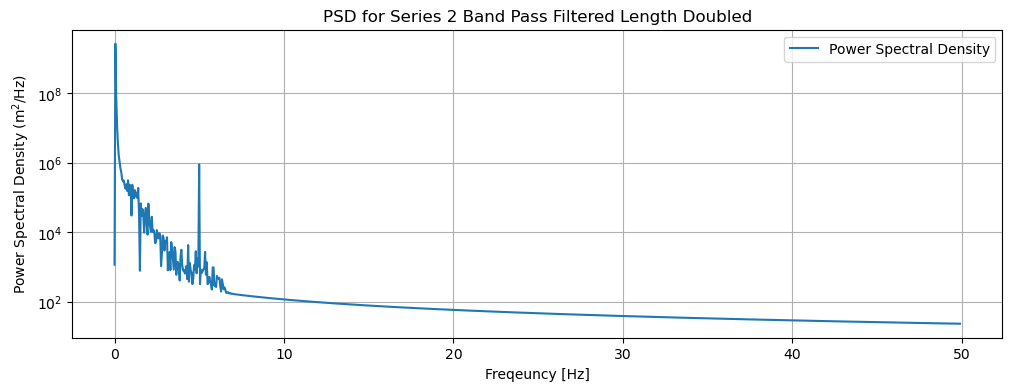

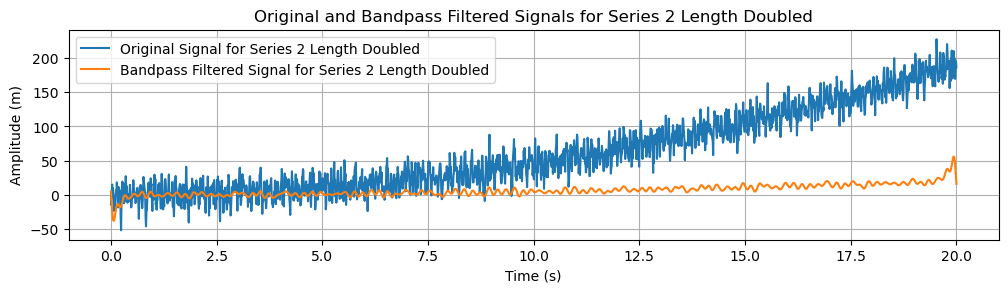

In [271]:
# Apply the custom bandpass filter to the time series
filtered_series2_bandpass_doubled = bandpass_filter(series2_doubled, cutoff_frequency_low, cutoff_frequency_high, sample_rate_doubled, 1)

# Fourier Transforming 
SeriesTransforms(series2_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Length Doubled')
SeriesTransforms(filtered_series2_bandpass_doubled, n_points_doubled, 0, 2000, 'PSD for Series 2 Band Pass Filtered Length Doubled')

# Plot the original and bandpass filtered signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_doubled, series2_doubled, label='Original Signal for Series 2 Length Doubled')
plt.plot(t_doubled, filtered_series2_bandpass_doubled, label='Bandpass Filtered Signal for Series 2 Length Doubled')
plt.title('Original and Bandpass Filtered Signals for Series 2 Length Doubled')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.legend()
plt.grid(True)
plt.show()